![example](images/director_shot.jpeg)

# Microsoft Film Performance Analysis

**Author:** Ian Musau
***

## Overview

Microsoft is in the process of creating a movie studio and is in need of information pertaining to 
which genres would be most likely to ensure success. This analysis makes use of data from various 
sources on the web to judge which genres perform the best in terms of box office results and viewer
satisfaction. Analysis shows that any combination of adventure, animation and sci-fi has 
a great chance of being a hit with viewers.

## Business Problem

Microsoft is looking to endavour into the film industry and would like analysis on the types of films 
that would be the most profitable to create. By profiling the genres most likely to succeed, the risk factor 
is reduced for the new studio.

This will be accomplished by answering the following questions:
- Which film genres perform the best at the box office?
- Which film genres receive the highest ratings by viewers?
- Which film genres present the highest return on investment?
- What is the typical budget of a successful film?
- What is the run time of the most successful films?


These questions will give a solid understanding of how different genres tend to perform at theaters. Once
answered, Microsoft will easily be able to judge the most prudent genres to venture into.

## Data Understanding

The film data used in this analysis was sourced from IMDb, The Movie Database and
The Numbers. A multitude useful data is in the datatsets including box office performance, 
ratings by viewers and budgets.

The main point of focus will be the genres of the movies. Grouping by genre and the comparing 
metrics such as box office performance and viewer ratings will give insight as to best kinds 
of movies the studio can pursue.

In order to recreate the analysis, extract the files in "zippedData" into a folder named "data" in the project root directory.

In [620]:
# Import standard packages
import pandas as pd
import seaborn as sns
import sqlite3 

%matplotlib inline

conn = sqlite3.connect('data/im.db')

#### Exploring IMDb dataset ####

The first point of interest is dicovering the tables in the IMDb database and the sort of information within.

In [621]:
imdb_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type = 'table';", conn)
imdb_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [622]:
#inspecting the movie basics information
imdb_basics_df = pd.read_sql("SELECT * FROM movie_basics", conn)
print(imdb_basics_df.info())
imdb_basics_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [623]:
#inspecting movie_ratings table
imdb_ratings_df = pd.read_sql("SELECT * FROM movie_ratings", conn)
print(imdb_ratings_df.info())
imdb_ratings_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


#### Exploring TheMovieDB Dtataset ####

In [624]:
#inspecting tmdb.movies.csv
tmdb_movie_df = pd.read_csv("data/tmdb.movies.csv")
print(tmdb_movie_df.info())
tmdb_movie_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB
None


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


### Exploring The Numbers Dataset ####

In [625]:
#inspecting tn.movie_budgets.csv
def load_tn():
    return pd.read_csv("data/tn.movie_budgets.csv")

tn_budgets_df = load_tn()
print(tn_budgets_df.info())

tn_budgets_df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


## Data Preparation

From the data above, a combined dataset is compiled using titles from IMDb and ratings from both 
IMDb and TheMovieDB. Budget and revenue data from The Numbers is then attached to the relevant 
movie using the titles to join them.

Missing values were dropped from the dataset as the datasets containing monetary data are significantly 
smaller than the entire dataset of movies. Films that do not have revenue and budget data are 
not useful in the analysis as we are trying to ascertain the most profitable types of movies.

With this combined dataset, visualizations are easily created with all relevant information in 
one place.

#### Creating a combined dataset

1. Gather ratings from IMDb and TheMovieDB

In [626]:
#remove duplicates
def remove_combined_duplicates():
    combined_film_df.drop_duplicates(subset="name", keep="first", inplace=True)

#combining the IMDb tables first
combined_film_df = imdb_basics_df[["movie_id","primary_title", "genres", "runtime_minutes"]].copy()
combined_film_df.rename(columns={"primary_title" : "name"}, inplace=True)
combined_film_df.rename(columns={"runtime_minutes" : "runtime"}, inplace=True)
combined_film_df.name = combined_film_df.name.str.strip()
remove_combined_duplicates()
#assigning films their associated ratings using the movie_id foreign key in ratings table
combined_film_df = pd.merge(combined_film_df, imdb_ratings_df, on = ["movie_id"], how = "right")
combined_film_df.rename(columns={"averagerating" : "imdb_rating"}, inplace=True)
#number of votes not used in analysis
combined_film_df.drop("numvotes", axis = 1, inplace=True)

#renaming movie title column for simpler merging
tmdb_movie_df.rename(columns={"original_title" : "name"}, inplace=True)
#adding ratings from The Movie Database
combined_film_df = pd.merge(combined_film_df, tmdb_movie_df, on = ["name"], how = "right")
#dropping columns not used in analysis

combined_film_df.rename(columns={"vote_average" : "moviedb_rating"}, inplace=True)
#remove the few movies that don't have a rating on movie_db
combined_film_df = combined_film_df[combined_film_df.moviedb_rating != 0]
combined_film_df.dropna(inplace=True)
#combining imdb and moviedb ratings to average
combined_film_df["rating"] = (combined_film_df.imdb_rating + combined_film_df.moviedb_rating) / 2

combined_film_df.drop([
    "movie_id", "Unnamed: 0", "genre_ids", "id", "original_language", "popularity", "release_date",
    "title", "vote_count", "imdb_rating", "moviedb_rating"
], axis = 1, inplace = True)



print("Dataset Size: ",len(combined_film_df))
combined_film_df.head(2)

Dataset Size:  13886


,name,genres,runtime,rating
0,Harry Potter and the Deathly Hallows: Part 1,"Adventure,Fantasy,Mystery",146.0,7.7
1,How to Train Your Dragon,"Action,Adventure,Animation",98.0,7.9


2. Gather monetary information from The Numbers dataset

In [627]:
#removing "$" and commas from money strings and returning float conversion
def str_to_float_in_m(column):
    converted = column.str.replace("$", "")
    converted = converted.str.replace(",", "")
    converted = in_millions(converted)
    return converted
#converting money string to float in millions
def in_millions(column):
    column = round(column.astype(float) / 1000000, 2)
    return column

tn_budgets_df = load_tn()
tn_budgets_df.domestic_gross = str_to_float_in_m(tn_budgets_df.domestic_gross)
tn_budgets_df.worldwide_gross = str_to_float_in_m(tn_budgets_df.worldwide_gross)
tn_budgets_df.production_budget = str_to_float_in_m(tn_budgets_df.production_budget)

#load money values
tn_budgets_df.rename(columns={"movie" : "name"}, inplace=True)
combined_film_df = pd.merge(combined_film_df, tn_budgets_df, on = ["name"], how = "left")
combined_film_df.drop(["id", "release_date", "domestic_gross"], axis=1, inplace=True)
combined_film_df.dropna(inplace=True)

remove_combined_duplicates()
combined_film_df.head(2)

,name,genres,runtime,rating,production_budget,worldwide_gross
1,How to Train Your Dragon,"Action,Adventure,Animation",98.0,7.9,165.0,494.87
2,Iron Man 2,"Action,Adventure,Sci-Fi",124.0,6.9,170.0,621.16


#### Feature Engineering
The next step was adding a column for ROI (Return On Investment) by calculating net profit as a percentage of budget.

In [628]:
print("Dataset Size: ",len(combined_film_df))
#calculating return on investment (net profit / cost * 100)
gross = combined_film_df.worldwide_gross
budget = combined_film_df.production_budget
combined_film_df["ROI"] = (gross - budget)/budget * 100
combined_film_df.sort_values("ROI", ascending=False).head(2)

Dataset Size:  1666


,name,genres,runtime,rating,production_budget,worldwide_gross,ROI
7272,The Gallows,"Horror,Mystery,Thriller",81.0,4.50,0.1,41.66,41560.0
2499,The Devil Inside,Horror,83.0,4.45,1.0,101.76,10076.0


As some films have more than one genre, the genre strings are then split by "," into a list 
of strings. The list is then exploded so that each movie can contribute to its various genres 
in visualization. Note the name and genre columns.

In [629]:
combined_film_df.genres = combined_film_df.genres.str.split(",")
exploded_genre_df = combined_film_df.explode("genres")
exploded_genre_df.sort_values("ROI", ascending=False).head(5)

,name,genres,runtime,rating,production_budget,worldwide_gross,ROI
7272,The Gallows,Thriller,81.0,4.50,0.10,41.66,41560.0
7272,The Gallows,Horror,81.0,4.50,0.10,41.66,41560.0
7272,The Gallows,Mystery,81.0,4.50,0.10,41.66,41560.0
2499,The Devil Inside,Horror,83.0,4.45,1.00,101.76,10076.0
8708,Graduation Day,Thriller,75.0,5.00,0.25,23.89,9456.0


Exploring the genre counts revalals that the "News" category features only once and would therefore 
not contribute valid analysis for the genre. It is dropped as a result.

In [630]:
exploded_genre_df.genres.value_counts()

genres
Drama          834
Comedy         542
Action         444
Adventure      344
Thriller       306
Crime          260
Horror         223
Romance        212
Sci-Fi         147
Biography      140
Mystery        133
Fantasy        125
Animation       98
Family          96
Documentary     65
History         49
Music           47
Sport           35
War             21
Western         12
Musical          8
News             1
Name: count, dtype: int64

In [631]:
exploded_genre_df = exploded_genre_df[exploded_genre_df.genres != "News"]

## Data Modeling

As Microsoft would like to know the most profitable genre of film to make, we begin by analyzing every genre's median revenue, median return on investment and mean ratings. Ths is followed by inspecting run times of genres of interest 
and exploring any correlations in the data.

The use of median for inspecting revenue and return on investment is to mitigate the effect of outliers 
that would otherwise skew results. Some outliers drastically overestimate their genre's performance 
when majority of other movies in te same genre struggled in the box office.

Effect of budget spent on revenue returned.

#### Genre performance analysis

In [632]:
#return bar plot for specific column grouped by genre
def view_column_by_genre(column, title, ylabel, method = "median",
                         plottype = "bar", dataframe = exploded_genre_df, genres = exploded_genre_df.genres.unique()):
    sns.set_theme(font_scale = 1)
    ax = sns.catplot(
        data= dataframe,
        x = dataframe.genres,
        y= dataframe[column],
        kind = plottype,
        height = 9,
        aspect=2,
        order = sorted(genres),
        estimator = method,
    )
    ax.set_xlabels("Genre", fontsize=20)
    ax.set_ylabels(ylabel, fontsize=20)
    ax.figure.suptitle(title, fontsize=20)

    return ax

### Worldwide gross per genre.

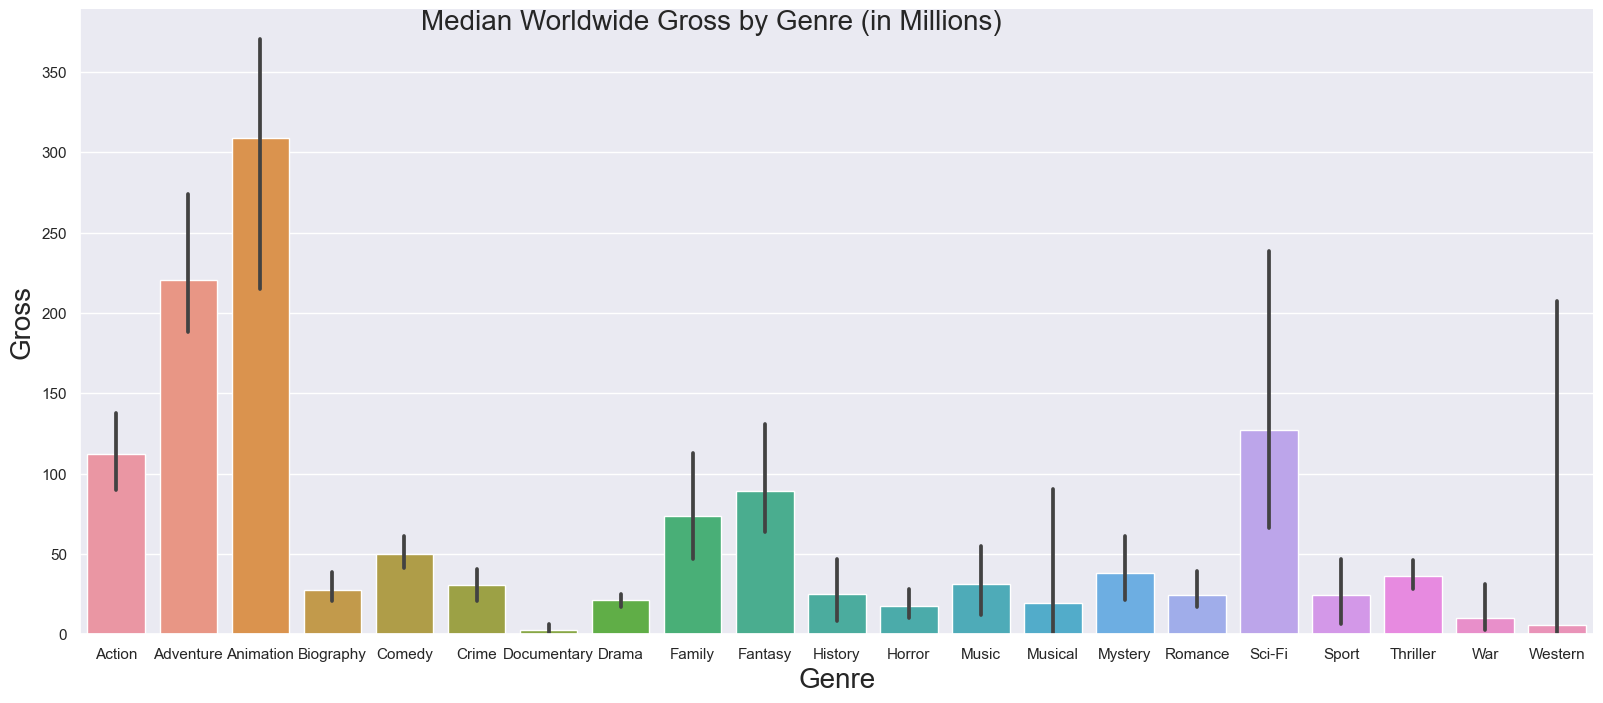

In [633]:
view_column_by_genre(
    "worldwide_gross",
    "Median Worldwide Gross by Genre (in Millions)",
    "Gross",
);

### Observations
Amination, adventure, action and sci-fi stand out as the only genres with a median above 100 miillion.
Animation and adventure look particularly impressive.

### Return on investment per genre.

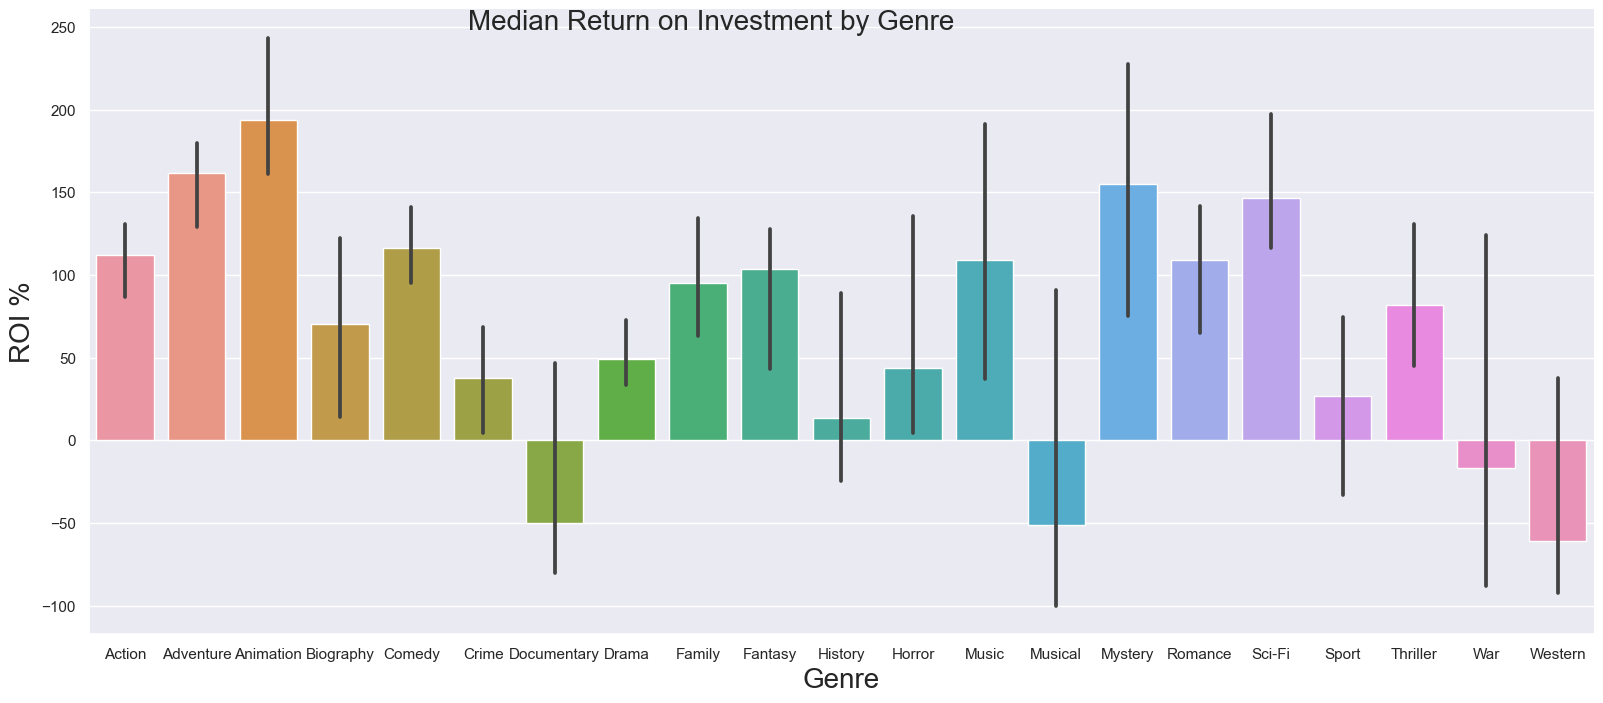

In [634]:
view_column_by_genre(
    "ROI",
    "Median Return on Investment by Genre",
    "ROI %"
);

### Observations
In terms of ROI, animation, adventure and sci-fi still stand out from the rest. Curiously, mystery and romance boast impressive returns while not earning as much as top genres at the box office. This suggests mystery and romance films can be made cheaply enough to be worth investing in.

### Average rating per genre on IMDb and TheMovieDB.

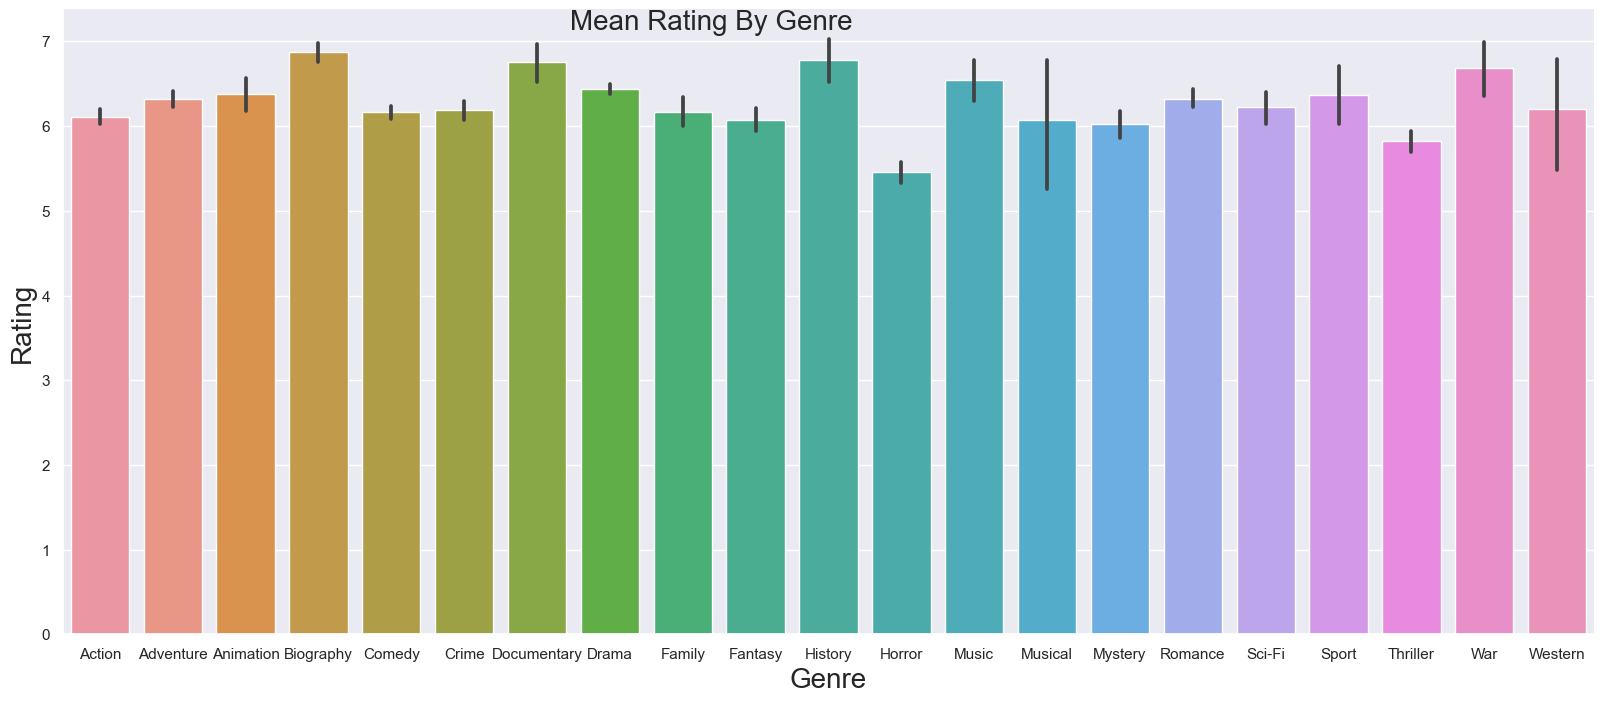

In [635]:
view_column_by_genre(
    "rating",
    "Mean Rating By Genre",
    "Rating",
    method="mean",
);

### Observations
No concrete conclusions can be made based on viewer ratings as they mostly fall between 6/10 and 7/10. Notably horror and thriller films fall between 5 and 6 out of 10. Genres that do not perform well in the box office such as war and western films still garner good ratings suggesting there are people who enjoy these films, but their market size is limited.

These are the genres that show the best performance in terms of revenue.

In [636]:
best_genres = ["Adventure", "Animation", "Sci-Fi"]
best_genre_df = exploded_genre_df[exploded_genre_df.genres.apply(lambda x : x in best_genres)].copy()

### Inspecting runtime in minutes for the best performing genres.

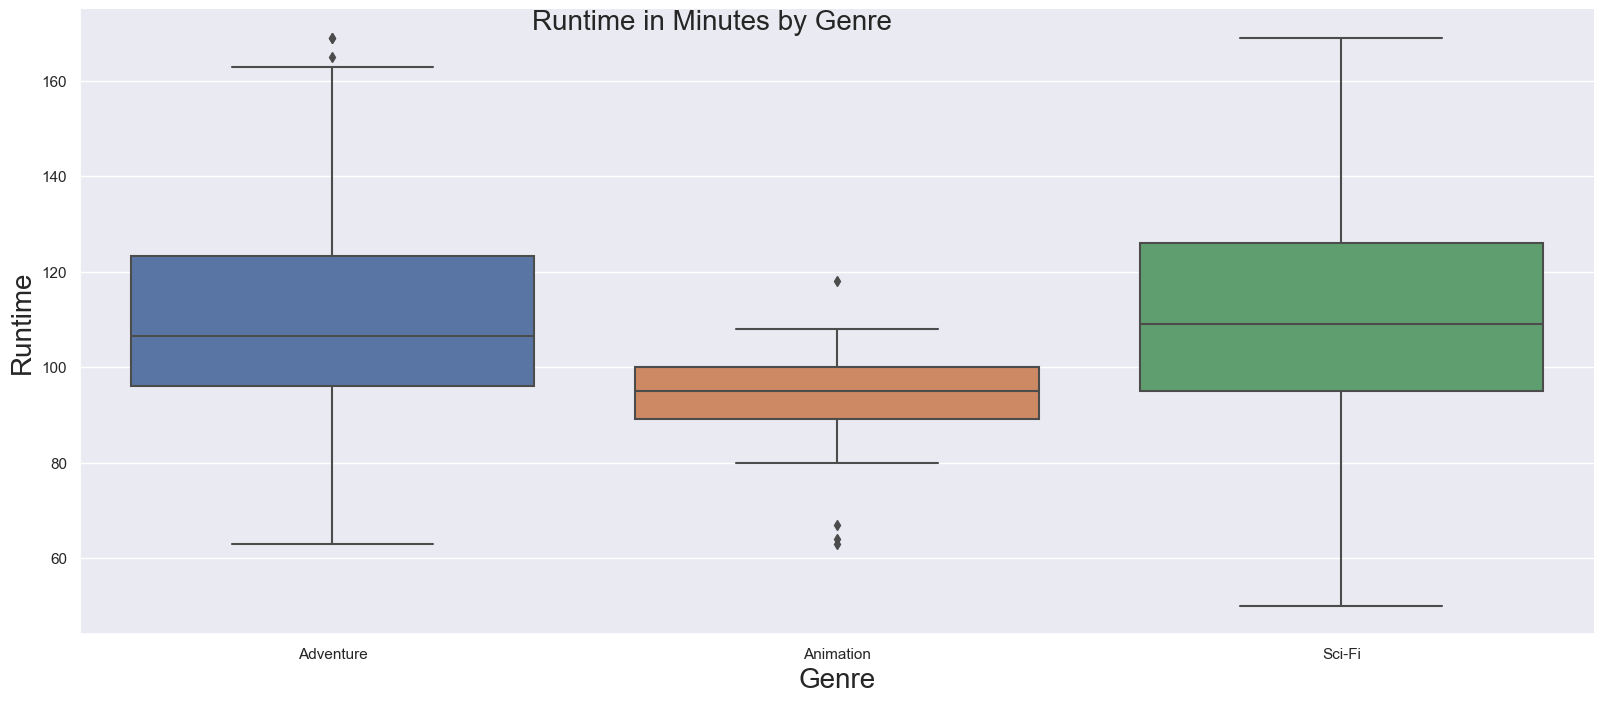

In [637]:
view_column_by_genre(
    "runtime",
    "Runtime in Minutes by Genre",
    "Runtime",
    plottype="box",
    dataframe=best_genre_df,
    genres=best_genres
);

### Observations
From inspecting runtimes for the top grossing genres 90 to 120 minutes looks like the optimal range for the length of the films.

### Exploring correlations in the dataset.

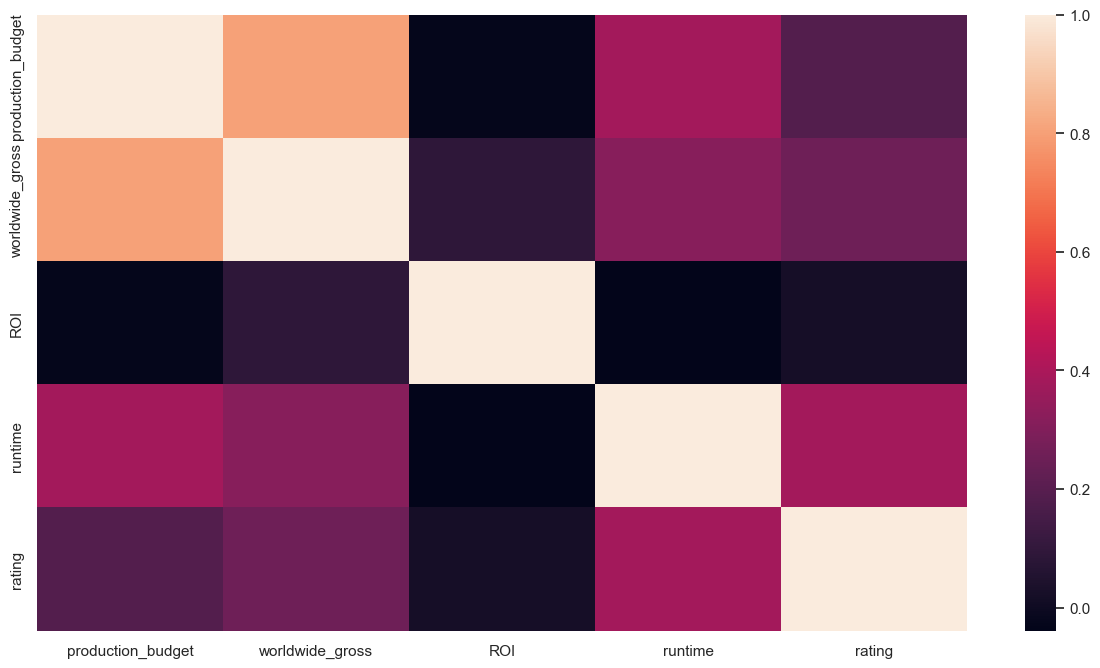

In [638]:
corr_matrix = combined_film_df[[
    "production_budget", "worldwide_gross", "ROI", "runtime", "rating"
]].corr()
sns.heatmap(corr_matrix);

### Observations
From the heat map, the strongest correlation seems to be between budget and gross. Notable seems completely diconnected from all variables except gross and ever so slightly by ratings.

Given the heat map above, the next step was to explore the relatonship between budget and gross for the top genres.

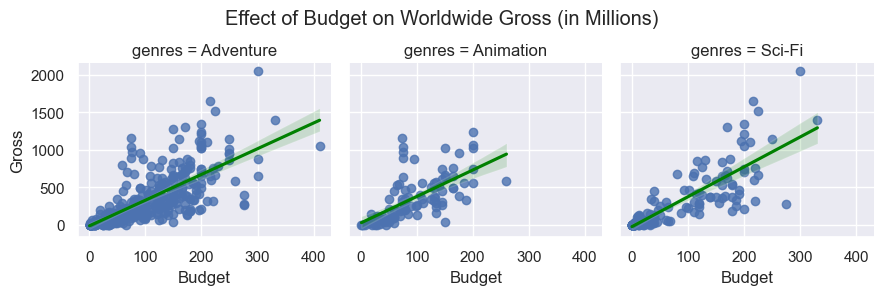

In [639]:
grid = sns.FacetGrid(
    best_genre_df,
    col="genres",
    col_wrap=3)
grid.map(
    sns.regplot,
    "production_budget",
    "worldwide_gross",
    line_kws={
        "color" : "green"
    }
)
grid.set(xlabel="Budget", ylabel="Gross")
grid.figure.suptitle("Effect of Budget on Worldwide Gross (in Millions)")
grid.figure.subplots_adjust(top=0.8)

### Observations
As the budget increases, the gross revenue trends upwards. For adventure and animation, 50 to 100 million appears sufficient to achieve gross comparable to films that spent four times as much in production. Though this seems more like an exception, than the rule. A safe bet appears to be 100 to 150 million to ensure good returns at the box office.

Effect of Budget on Return on Investment

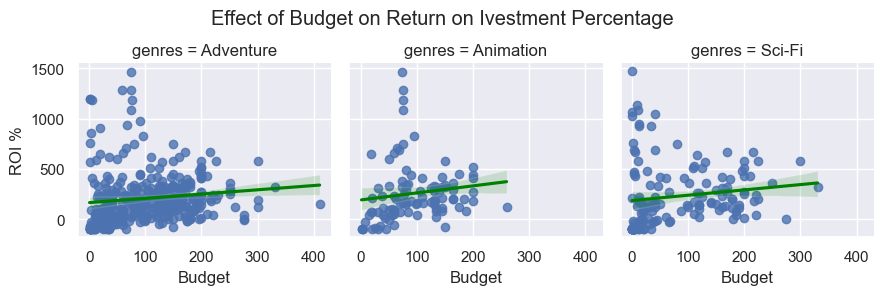

In [640]:
grid = sns.FacetGrid(
    best_genre_df,
    col="genres",
    col_wrap=3)
grid.map(
    sns.regplot,
    "production_budget",
    "ROI",
    line_kws={
        "color" : "green"
    }
)
grid.set(xlabel="Budget", ylabel="ROI %")
grid.figure.suptitle("Effect of Budget on Return on Ivestment Percentage")
grid.figure.subplots_adjust(top=0.8)

### Observations

While the regression line between budget and ROI is less steep, an increase in budget does tend to increase the ROI. Wlie there are outliers that spent 50 million or less to yield the highest returns, 100 to 150 million still appears the safest bet for good returns. It is worth noting that 100 million mark, the number of films that yield negative returns reduces greatly.

#### Closing IMDb database connection

In [641]:
conn.close()

## Evaluation

####  Genre
* Films in the adventure, animation and sci-fi genres clearly outperform the rest. Movies that 
combine any of these genres tend to be a hit in the box office.
* An alternative strategy is the creation of mystery and romance films which are significantly 
cheaper to make, but yield high return on investment.
#### Budget
* A budget of 100 to 150 million all but ensures great returns and limits risk of negative 
return on inestment.
* A budget of 10 to 50 million is sufficient to create mystery and romance films.
#### Runtime
* The length of films does not affect how they are recieved by fans or their box office performance. 
* A length of 90 to 120 minutes seems the industry standard.

## Conclusions

This analysis set out to ascertain the most profitable genres for a studio to create. 
The data available was sufficient to observe market trends and get a feel for what 
audiences want to see in theatres.

Some limitations include the lack of monetary data for a large number of movies in the 
dataset. As a result, the number of useful observations were reduced significantly. 

Given the findings of the analysis, it is clear that any combination of the adventure, 
animation and sci-fi genres would present the least risk to the studio in terms of 
return on investment. A budget of 100 to 150 million is needed to create quality 
films that audiences would enjoy and pay to see. Run time is not a significant 
variable in the equation, but 90 to 120 minutes is sufficient. If the story of the 
films require less or more the time, the studio is at liberty to adjust.